# fastReach Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pickle
from matplotlib.lines import Line2D

from itertools import cycle

<font size="5">     <b>Loading data</b>

In [2]:
pID = '4'

path = "/Users/willy/Documents/GitHub/2021-fastReach/data/study/eeglab2python/"

data_fname = '\data.csv'
data = pd.read_csv(path+pID+data_fname)
data

,sample,epoch_ix,rp_class,Motion,F2,F6,FT10,TP7,CPz,FT8,...,FC4,C5,CP4,P4,C3,FC5,T7,O2,Fp2,Oz
0,-0.996,1,1,0.000284,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.992,1,1,0.000297,0.451998,0.423090,0.626064,-0.085087,-0.085220,-0.082924,...,-0.086807,-0.079891,-0.038812,-0.382422,-0.121314,1.183095,-0.035595,-0.220005,-0.244426,-0.449111
2,-0.988,1,1,0.000311,0.964931,0.911551,1.338059,-0.216738,-0.216401,-0.212457,...,-0.220168,-0.206279,-0.045201,-0.745794,-0.281753,2.388779,0.017795,-0.341143,-0.489806,-0.831210
3,-0.984,1,1,0.000326,1.523839,1.450613,2.104944,-0.388071,-0.386860,-0.381781,...,-0.393209,-0.372548,-0.016683,-1.074885,-0.473650,3.556722,0.162914,-0.366280,-0.725387,-1.135646
4,-0.980,1,1,0.000341,2.110351,2.021963,2.891875,-0.590140,-0.587843,-0.581985,...,-0.596990,-0.570016,0.047077,-1.356209,-0.687682,4.626973,0.397201,-0.302651,-0.940551,-1.356142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24495,-0.016,98,2,0.000012,9.726415,2.788549,5.264484,-10.384810,-10.399400,-10.429659,...,-10.485573,-10.353042,2.391333,7.378460,-10.264901,21.426891,-5.830628,10.557298,-6.293686,12.323117
24496,-0.012,98,2,0.000014,9.420365,2.657939,4.728290,-10.322257,-10.344740,-10.370124,...,-10.420036,-10.293506,2.379255,7.209304,-10.043826,21.725585,-5.737022,10.314636,-6.063197,12.168587
24497,-0.008,98,2,0.000016,9.178169,2.559136,4.227846,-10.223778,-10.254526,-10.274336,...,-10.317313,-10.199704,2.331454,6.978546,-9.851417,21.966721,-5.605020,10.031201,-5.868134,11.923399
24498,-0.004,98,2,0.000017,9.006196,2.497364,3.781668,-10.094714,-10.133874,-10.147514,...,-10.182948,-10.076862,2.249457,6.693327,-9.693788,22.152715,-5.435137,9.714115,-5.717508,11.599891


<font size="5">     <b>Feature extraction</b>

<u/>1) EEG Readiness Potential<u/>

In [3]:
win_mean_size = 25
win_mean1 = np.arange(len(data))//win_mean_size  #List with all the indices with floor division of the size reduction. 
                                                # --> 24500 indices ranging from 0 to 980.

win_mean = data.groupby(win_mean1).mean()

df2 = win_mean.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_mean.columns[4:].tolist())
df2.reset_index(inplace=True)

df2

epoch_ix rp_class         F2                                   \
sample                       -0.948     -0.848     -0.748     -0.648   
0           1.0      1.0   3.282288  -2.864277 -10.539297 -11.399815   
1           2.0      1.0  -1.528737  -7.494974 -10.964169  -9.840232   
2           3.0      1.0  -7.473053  -5.078388  -7.415267  -2.027202   
3           4.0      1.0   2.679745   8.918466  10.453093   1.300576   
4           5.0      1.0 -30.362271 -49.097795 -46.536114 -41.969156   
..          ...      ...        ...        ...        ...        ...   
93         94.0      2.0  -3.423430  -7.376545  -7.311667  -3.612773   
94         95.0      2.0  -2.003583  -2.751980 -11.247545 -15.022379   
95         96.0      2.0  -3.256235  -5.952935  -7.394158  -6.318371   
96         97.0      2.0   2.029714  14.659434  26.050561  28.127828   
97         98.0      2.0   0.666228   6.954978   8.786285   9.559998   

                                                                       ...  \
sample -0.5479999999999999 -0.44799999999999995     -0.348     -0.248  ...   
0               -17.454392             6.687935  17.822065  13.583739  ...   
1               -13.201647           -24.482395 -22.616821 -23.093906  ...   
2                -2.112458            -7.625805   0.897511   3.516418  ...   
3                -5.114602            -7.059904  -2.354670   1.516518  ...   
4               -39.076412           -40.783365 -33.788141 -26.030446  ...   
..                     ...                  ...        ...        ...  ...   
93               -9.009335           -12.149962  -2.261219  -8.654598  ...   
94              -18.990101           -21.790945 -15.468030 -10.495412  ...   
95               -5.888396            -3.014071 -10.286468   7.619862  ...   
96               27.423531            34.738249  32.301454  33.352569  ...   
97                3.947659             0.692298   7.078276   9.789315  ...   

               Oz                                                       \
sample     -0.948     -0.848     -0.748     -0.648 -0.5479999999999999   
0       -0.922527   2.617241   4.184626   2.640527            7.848075   
1        1.522111   1.501207   9.121252   8.381323          -16.802737   
2       14.289437  24.167478  26.194310  22.684586           22.984157   
3       -4.463095 -22.889971 -23.813612 -12.302784          -10.176818   
4       11.267029  22.065584  27.163310  29.351040           27.274924   
..            ...        ...        ...        ...                 ...   
93       1.411396  -3.396190   2.420803   3.632321            8.700813   
94      -0.218325   3.927987   3.725214   4.206754            4.655766   
95      -0.824558  -1.312089  -2.933522  -1.137531           -4.399715   
96      -0.958414  -8.727340 -10.439504  -2.582328           -0.194871   
97       1.788243   1.788488  -0.929442  -2.686232           -3.282807   

                                                                        \
sample -0.44799999999999995     -0.348     -0.248 -0.14800000000000002   
0                 13.466062  16.336413  24.368560            12.298253   
1                -27.511083 -15.464435  -9.136322            -9.053727   
2                 -0.800211  -8.272674   3.247681             6.002627   
3                 -8.099017 -12.552708  -7.341915           -10.711068   
4                 32.360032  27.672612  26.717159            30.461451   
..                      ...        ...        ...                  ...   
93                 8.481800   8.598577  -0.710041           -11.058030   
94                 5.664056   8.829470   9.295564             6.746931   
95                -8.687288 -22.229305  -6.909282             1.972092   
96                -1.437661  -2.878803   2.208519             2.925428   
97                 1.529352   6.109620   4.665368             0.234689   

                   
sample     -0.048  
0        5.927113  
1       -4.571908  
2       10.004679  
3       -6.833907  
4       3

<u/>2) EMG Time-domain features<u/>

In [4]:
# Definition of the features

def rms(values):
    return np.sqrt(sum(values**2)/len(values))

def mini(values):
    return np.min(values)

def maxi(values):
    return np.max(values)

def mav(values):
    return np.mean(abs(values))

def mean(values):
    return np.mean(values)

def var(values):
    return np.var(values)

#def wave(values):
#    values = np.asarray(values, dtype=object)
#    a = np.asarray(values[1:,1], dtype=object)
#    b = np.asarray(values[:-1,1], dtype=object)
#    t = np.sum(np.abs(a - b))
#    return t

In [5]:
#Choose the features to apply
feat_list = [rms, mini, maxi, mav, mean, var]

bibi =[None] * len(feat_list)
delto =[None] * len(feat_list)
bibi_2 =[None] * len(feat_list)
delto_2 =[None] * len(feat_list)

#Version 1: Get 10 features per channel per epoch
for i in range(len(feat_list)):
    bibi[i] = data.groupby(win_mean1)['Cz'].apply(feat_list[i])
    delto[i] = data.groupby(win_mean1)["T7"].apply(feat_list[i])

#Version 2:  Get 1 feature per channel per epoch
for i in range(len(feat_list)):
    bibi_2[i] = data.groupby(['epoch_ix'])['Cz'].apply(feat_list[i])
    delto_2[i] = data.groupby(['epoch_ix'])["T7"].apply(feat_list[i])

<font size="5">     <b>Building the Dataframe</b>

<font size="3">     <b>version 1: 10 EMG features per epoch </b>

In [6]:
#Labels
sample = win_mean['sample']
Class = np.asarray([data['rp_class'][0] for i in range(int(bibi[0].shape[0]/2))] + \
        [data['rp_class'][24499] for i in range(int(bibi[0].shape[0]/2))])
epoch = win_mean['epoch_ix']

l = np.column_stack((sample, Class, epoch))
lab = pd.DataFrame(l, columns = ['sample','Class','epoch'])

#Features' labels
#Naming the features
nfeat_list = ['rms', 'mini', 'maxi', 'mav', 'mean', 'var']
chan_Bibi = [f'Bibi_{feat}' for feat in feat_list]
chan_Delto = [f'Delto_{feat}' for feat in feat_list]

#Features dataframe Version 1
m1 = [bibi[i] for i in range(len(feat_list))]
m2 = [delto[i] for i in range(len(feat_list))]
f1 = np.column_stack((m1))
f2 = np.column_stack((m2))
f = np.column_stack((f1, f2))
feat = pd.DataFrame(f, columns = chan_Bibi + chan_Delto)

#Concat labels and features
feat = feat.astype(float)
FM = pd.concat([lab, feat], axis=1)

#Reshape the EMG dataframe
df3 = FM.pivot(index=['epoch', 'Class'], columns='sample', values=FM.columns[4:].tolist())
df3.reset_index(inplace=True)

#Concat EEG and EMG dataframe
EEG_EMG = pd.concat([df2, df3.iloc[:,3:]], axis=1)

<font size="3">     <b>version 2: 1 EMG feature per epoch </b>

In [7]:
#Labels
sample_2 = np.asarray([1]*98)
Class_2 = np.asarray([data['rp_class'][0] for i in range(int(bibi_2[0].shape[0]/2))] + \
        [data['rp_class'][24499] for i in range(int(bibi_2[0].shape[0]/2))])
epoch_2 = np.arange(1,data['epoch_ix'].max() + 1)

l_2 = np.column_stack((sample_2, Class_2, epoch_2))
lab_2 = pd.DataFrame(l_2, columns = ['sample','Class','epoch'])

#Features dataframe Version 2
m1_2 = [bibi_2[i] for i in range(len(feat_list))]
m2_2 = [delto_2[i] for i in range(len(feat_list))]
f1_2 = np.column_stack((m1_2))
f2_2 = np.column_stack((m2_2))
f_2 = np.column_stack((f1_2, f2_2))
feat_2 = pd.DataFrame(f_2, columns = chan_Bibi + chan_Delto)

#Concat labels and features 2
feat_2 = feat_2.astype(float)
FM_2 = pd.concat([lab_2, feat_2], axis=1)

#Reshape the EMG dataframe 2
df3_2 = FM_2.pivot(index=['epoch', 'Class'], columns='sample', values=FM_2.columns[4:].tolist())
df3_2.reset_index(inplace=True)

#Concat EEG and EMG dataframe 2
EEG_EMG_2 = pd.concat([df2, df3_2.iloc[:,3:]], axis=1)

In [8]:
EEG_EMG

epoch_ix rp_class         F2                                   \
sample                       -0.948     -0.848     -0.748     -0.648   
0           1.0      1.0   3.282288  -2.864277 -10.539297 -11.399815   
1           2.0      1.0  -1.528737  -7.494974 -10.964169  -9.840232   
2           3.0      1.0  -7.473053  -5.078388  -7.415267  -2.027202   
3           4.0      1.0   2.679745   8.918466  10.453093   1.300576   
4           5.0      1.0 -30.362271 -49.097795 -46.536114 -41.969156   
..          ...      ...        ...        ...        ...        ...   
93         94.0      2.0  -3.423430  -7.376545  -7.311667  -3.612773   
94         95.0      2.0  -2.003583  -2.751980 -11.247545 -15.022379   
95         96.0      2.0  -3.256235  -5.952935  -7.394158  -6.318371   
96         97.0      2.0   2.029714  14.659434  26.050561  28.127828   
97         98.0      2.0   0.666228   6.954978   8.786285   9.559998   

                                                                       ...  \
sample -0.5479999999999999 -0.44799999999999995     -0.348     -0.248  ...   
0               -17.454392             6.687935  17.822065  13.583739  ...   
1               -13.201647           -24.482395 -22.616821 -23.093906  ...   
2                -2.112458            -7.625805   0.897511   3.516418  ...   
3                -5.114602            -7.059904  -2.354670   1.516518  ...   
4               -39.076412           -40.783365 -33.788141 -26.030446  ...   
..                     ...                  ...        ...        ...  ...   
93               -9.009335           -12.149962  -2.261219  -8.654598  ...   
94              -18.990101           -21.790945 -15.468030 -10.495412  ...   
95               -5.888396            -3.014071 -10.286468   7.619862  ...   
96               27.423531            34.738249  32.301454  33.352569  ...   
97                3.947659             0.692298   7.078276   9.789315  ...   

       Delto_<function var at 0x0000025C84E65F70>                        \
sample                                     -0.948     -0.848     -0.748   
0                                        2.011027   8.944829  22.241729   
1                                        1.061384   1.898542   2.789111   
2                                       28.191530   3.745698   3.563367   
3                                        0.128162   1.463051   2.755890   
4                                       80.753800   0.805646   1.019107   
..                                            ...        ...        ...   
93                                       3.172246   0.579677   1.416414   
94                                       1.266167   2.083955  11.425555   
95                                       6.955478   0.084419   3.038218   
96                                       0.191856  19.237022   1.853400   
97                                       2.997250   0.629186  14.236499   

                                                                      \
sample     -0.648 -0.5479999999999999 -0.44799999999999995    -0.348   
0        3.666572           28.928066            18.805134  0.625730   
1        0.577715           12.248568             0.460132  0.180124   
2        9.623938            2.634071            51.607354  7.263005   
3        6.762058            0.694028             1.498024  0.257138   
4        5.727208            0.456741             3.340642  0.041181   
..            ...                 ...                  ...       ...   
93      11.073385            3.198975             4.096876  0.488642   
94       1.203771            2.875641             4.447176  1.166212   
95       0.740631            0.711588             1.300066  2.185210   
96       3.768271            1.456652             0.496000  1.841609   
97       3.222155            1.075812             1.810741  0.669238   

                                                   
sample     -0.248 -0.14800000000000002     -0.048  
0       19.029558             8.068903

<font size="5">     <b>Plots</b>

<u/>1) Features<u/>

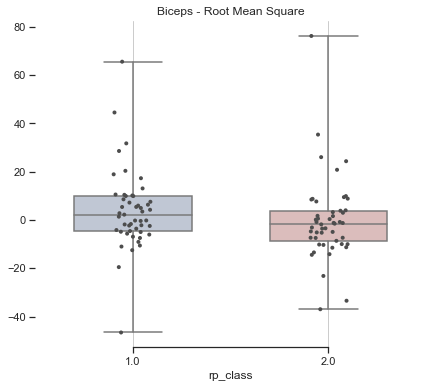

In [9]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
group_var = "rp_class"
val_var = EEG_EMG.iloc[:, 4]
F1 = sns.boxplot(x=group_var, y=val_var, data=EEG_EMG,
            whis=[0, 100], width=.6, palette="vlag")
F1.set(title='Biceps - Root Mean Square')

# Add in points to show each observation
sns.stripplot(x=group_var, y=val_var, data=EEG_EMG,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

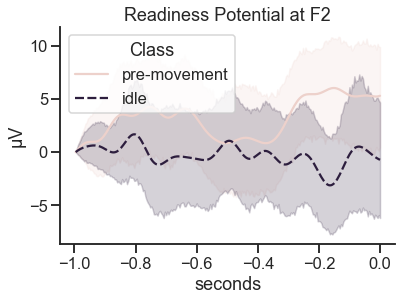

In [10]:
sns.set_theme(style="ticks")
sns.set_context("talk")

electrode = "F2"

# Plot the responses for different events and regions
g = sns.lineplot(x="sample", y=electrode,
             hue="rp_class", style="rp_class",
             data=data)
sns.despine()
g.set(xlabel='seconds', ylabel='\u03bcV', title='Readiness Potential at '+electrode)

# legend
leg = g.legend_
new_title = 'Class'
leg.set_title(new_title)
# replace labels
new_labels = ['pre-movement', 'idle']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)

<font size="5">     <b>Linear Discriminent Analysis</b>

<font size="5">     <b>EEG</b>

In [11]:
Xeeg = df2.iloc[:,2:].values
yeeg = np.asarray(df2['rp_class'])

clf_eeg = LDA(solver='lsqr', shrinkage='auto')

clf_eeg.fit(Xeeg, yeeg)
# print(clf.coef_)

# splits data randomly in n=folds 
kfolds = KFold(n_splits=10, random_state=1, shuffle=True) 

cv_results = cross_val_score(clf_eeg, Xeeg, yeeg, cv=kfolds)
cv_average = cv_results.mean()
print(cv_average)
st_deviation = cv_results.std()
print(st_deviation)

0.6344444444444445
0.14635066968934077


<font size="5">     <b>EEG EMG</b>

In [12]:
#Choice of the Dataframe
version = EEG_EMG

X = version.iloc[:,2:]
y = np.asarray(version['rp_class'])

clf = LDA()
clf.fit(X, y)

kfolds = KFold(n_splits=10, random_state=1, shuffle=True)

#Score of each fold
cv_results = cross_val_score(clf, X, y, cv=kfolds)
#Score averaged on each score
cv_average = cv_results.mean()
print(cv_average)
st_deviation = cv_results.std()
print(st_deviation)

0.5633333333333334
0.16435808543212463


In [30]:
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,2:], np.asarray(EEG_EMG['rp_class']), test_size=0.5, random_state=0)

clf_roc = LDA()

y_score = clf_roc.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=2)
roc_auc = auc(fpr, tpr)

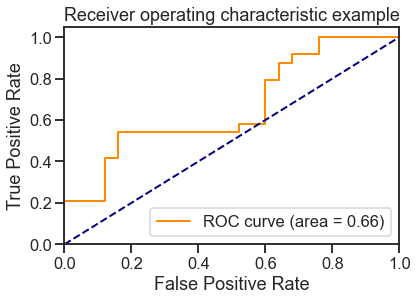

In [31]:
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

<font size="5">     <b>Accuracies over time</b>

Test the previously trained classifier on sliding windows over time.
Plot the accuracy over time.
Plot the velocity over time.

<u/>Load the data. <u/>

In [15]:
pathe = '/Users/willy/Documents/GitHub/2021-fastReach/analyses/Willy_tests/\eeg.csv'
pathm = '/Users/willy/Documents/GitHub/2021-fastReach/analyses/Willy_tests/\motion.csv'
#Import only the 50 000 first samples because it is too long otherwise. Previous classifier has been trained on 20 channels
#so import 20 channels (arbitrarly though, we need to select the good ones)
eeg = pd.read_csv(pathe,  usecols=range(50000), header=None, skiprows=[n for n in range(20,65,1)])
velocity = pd.read_csv(pathm, usecols=range(50000), header=None)

In [16]:
move = pd.read_csv('/Users/willy/Documents/GitHub/2021-fastReach/analyses/Willy_tests/\motion_onset_event_latencies.csv', header = None)
move = move.values[0]
idle = pd.read_csv('/Users/willy/Documents/GitHub/2021-fastReach/analyses/Willy_tests/\idle_event_latencies.csv', header = None)

<u/>Parameters. <u/>

In [17]:
#Time axis
fs = 250
time = np.column_stack(np.arange(0,eeg.shape[1]/fs,1/fs))

#Define the window parameters in terms of samples
win_size = int(fs)
sld_size = int(1)
feat_size = int(fs/10)
n_feat = int(win_size/feat_size)

<u/>Dataframe velocity over time<u/>

In [18]:
data_1 = pd.DataFrame(np.concatenate((time, velocity)).transpose(), columns = ['Time', 'Velocity'])

<u/>Exctract the feature from the eeg signal.<u/>

In [19]:
def slid_win(eeg_chans):
    '''
    Step 1: Compute the mean every n samples for all channels
    Step 2: Store these values into a 1s/250 samples sized window so that
            1 window corresponds to a row of dimensions (X means * n_channels)
    Step 3: Slide the window by 0.1s/25 samples and repeat the process
    Step 4: Return a matrix of dimension (n_window, features*n_channels)
    '''
    
    # Empty matrix with columns corresponding to correspond to 10 features * 20 channels = 200
    # Each row will correspond to 1 window.
    wins = np.zeros((((eeg_chans.shape[1]//sld_size)-win_size + sld_size),\
                        int((fs/feat_size) * eeg_chans.shape[0])))
    
    for k in range(len(wins)):# length of continuous data / slide size until last window.
    
        for j in range(eeg_chans.shape[0]):# Number of channels
    
            for i in range(n_feat):
        
                wins[k, i + 10 * j] = np.mean(eeg_chans.iloc[j, (0 + feat_size * i) + k * sld_size: \
                                                             (feat_size + feat_size * i) + k * sld_size])
        
        
    return wins

<u/>Apply the EEG classifier and get the probabilities of motion.<u/>

In [20]:
def prediction(wins):
    '''
    Step 1: Apply the classifier on each window
    Step 2: Extract the probability value corresponding to class motion
    Step 3: Interpolate the probabilities and make the array from n_windows to the length of the continuous data ?
    '''
    prob = np.zeros((wins.shape[0]))
    
    for i in range(wins.shape[0]):
        
        prob[i] = clf_eeg.predict_proba(wins[i,:].reshape(1, -1))[0][1]
        
    return prob

<u/>Apply the functions and uild the DataFrame with accuracy over time.<u/>

In [21]:
a = slid_win(eeg)

In [22]:
b = prediction(a)

#Fill the last part of prediction with 0.5 and concatenate the prediction array with the velocity.
fill = np.ones((eeg.shape[1] - b.shape[0]))*0.5
b = np.append(b, fill)
acc = pd.DataFrame(b, columns = ['Probability'])
vel_acc = pd.concat([data_1, acc], axis=1)
vel_acc

,Time,Velocity,Probability
0,0.000,0.000047,0.999995
1,0.004,0.000036,0.999995
2,0.008,0.000031,0.999994
3,0.012,0.000038,0.999994
4,0.016,0.000021,0.999995
...,...,...,...
49995,199.980,0.000009,0.500000
49996,199.984,0.000010,0.500000
49997,199.988,0.000023,0.500000
49998,199.992,0.000019,0.500000


<u/>Plot the motion and the accuracy together.<u/>

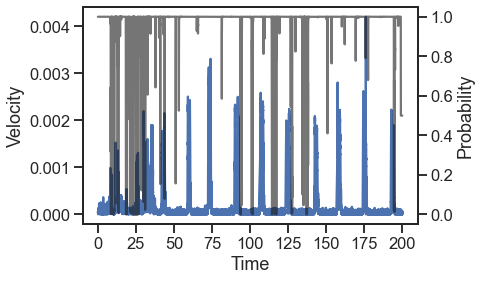

In [23]:
sns.lineplot(data=vel_acc, x='Time', y='Velocity')
ax2 = plt.twinx()
sns.lineplot(data=vel_acc, x='Time', y='Probability', ax=ax2, color='k', alpha=0.6)
sns.set(rc={"lines.linewidth": 1})

<u/>Plot the averaged epoch.<u/>

In [24]:
#Array of length data full of 0 which got 1 around the movement onset
true_motion = np.zeros((eeg.shape[1]))
bef_onset = 1000
aft_onset = 1000
velocity_array = velocity.values[0]

a_acc = np.zeros((bef_onset + aft_onset)*9)
a_motion = np.zeros((bef_onset + aft_onset)*9)
onset = np.ones((bef_onset + aft_onset)*9)
    
for i in range(9):
        
    a_acc[0+(bef_onset+aft_onset)*i:(bef_onset+aft_onset) + (bef_onset+aft_onset)*i] = b[move[i]-bef_onset:move[i]+aft_onset]
    a_motion[0+(bef_onset+aft_onset)*i:(bef_onset+aft_onset) + (bef_onset+aft_onset)*i] = velocity_array[move[i]-bef_onset:move[i]+aft_onset]
    onset[0+(bef_onset+aft_onset)*i:(bef_onset+aft_onset) + (bef_onset+aft_onset)*i] = i + 1

a_time = np.arange(-bef_onset,aft_onset)/1000
a_time = np.tile(a_time, (1, 9)).transpose()
a_vel_acc = pd.DataFrame(np.column_stack((a_time, onset, a_acc, a_motion)), columns=['Time','Movement', 'Probability', 'Velocity'])
a_vel_acc

,Time,Movement,Probability,Velocity
0,-1.000,1.0,0.997359,0.000249
1,-0.999,1.0,0.996545,0.000210
2,-0.998,1.0,0.996211,0.000208
3,-0.997,1.0,0.996784,0.000208
4,-0.996,1.0,0.997871,0.000217
...,...,...,...,...
17995,0.995,9.0,1.000000,0.000037
17996,0.996,9.0,1.000000,0.000013
17997,0.997,9.0,1.000000,0.000008
17998,0.998,9.0,1.000000,0.000009


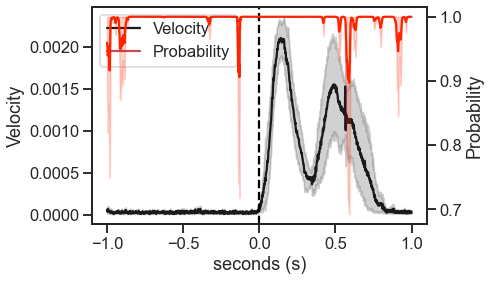

In [25]:
sns.set_theme(context='talk', style='ticks', palette='autumn')
ep_move = sns.lineplot(data=a_vel_acc, x='Time', y='Velocity', color='k', legend=False)

ep_move.set(xlabel='seconds (s)')

plt.axvline(0, color='black', label = 'onset', linestyle ='--')
#ax2 = plt.twinx()
ep_prob = sns.lineplot(data=a_vel_acc, x='Time', y='Probability', ax=ep_move.axes.twinx(), legend=False)

ep_move.legend(handles=[Line2D([], [], marker='_', color="k", label='Velocity'), Line2D([], [], marker='_', color="r", label='Probability')])